In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

#from scipy import stats
#from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

In [5]:
# Import data to Pandas DataFrame
songs = pd.read_csv('spotify_tracks.csv')

# Drop columns
# songs = data.drop(columns=['artist_id', 
#                             'track_name', 
#                             'track_duration_ms', 
#                             'track_track_number', 
#                             'track_explicit',
#                             'track_album_release_date', 
#                             'track_album_total_tracks',
#                             'track_album_available_markets', 
#                             'track_album_name', 
#                             'track_album_id',
#                             'track_album_available_markets_count',
#                             'track_album_single',])

# Drop duplicate rows
songs.drop_duplicates('track_id', keep='first', inplace=True)

# Preivew data
print(songs.info())
songs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637265 entries, 0 to 682192
Data columns (total 27 columns):
track_id                               637265 non-null object
artist_id                              637265 non-null object
track_name                             637263 non-null object
track_popularity                       637265 non-null int64
track_duration_ms                      637265 non-null int64
track_track_number                     637265 non-null int64
track_explicit                         637265 non-null bool
track_album_release_date               637265 non-null object
track_album_total_tracks               637265 non-null int64
track_album_available_markets          636703 non-null object
track_album_name                       637263 non-null object
track_album_id                         637265 non-null object
track_album_available_markets_count    637265 non-null int64
track_album_single                     637265 non-null int64
danceability                 

,track_id,artist_id,track_name,track_popularity,track_duration_ms,track_track_number,track_explicit,track_album_release_date,track_album_total_tracks,track_album_available_markets,track_album_name,track_album_id,track_album_available_markets_count,track_album_single,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0003Z98F6hUq7XxqSRM87H,08RxfNkJpjJ4dJb4xASWzj,Меня больше тут нет,26,241666,8,True,2015-07-09,14,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",#NoName,6bwGC40nfS1uxz5fkugvjw,79,0,0.733,0.711,1.0,-5.408,1.0,0.1580,0.08600,0.0000,0.4510,0.346,138.076,241667.0,4.0
1,0008brbqMd6r3WdmXEPbUq,23EIRSLrCdL882g8726POe,Healing Waters and Nature Sounds,1,189794,13,False,2017-03-14,50,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",50 Ambient Nature Sounds for Awakening: Mornin...,2WQypBQKujMcr4hy7WGXOu,79,0,0.263,0.203,2.0,-20.025,1.0,0.0325,0.88900,0.1130,0.3170,0.142,62.553,189795.0,5.0
2,0008ihzWSit1NmuXq2VBpE,1691tt3rtiWk8dmfbKWHtc,Once Forgotten,11,344866,4,False,1994-01-01,12,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",With The Tenors Of Our Time,3YGQ8eavqMUrAmMk72utlB,71,0,0.510,0.228,10.0,-17.138,1.0,0.0299,0.91400,0.6960,0.0847,0.322,128.759,344867.0,4.0
3,000BARWwSRfyAAYOxPMD83,6DJLhMrXhyW0XJXxFDIkUT,No Announcements ԅ[ •́ ﹏├┬┴┬┴,12,128219,1,True,2019-08-29,1,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",No Announcements ԅ[ •́ ﹏├┬┴┬┴,50CHxzeeyYYpUpx3dyn2w4,79,1,0.531,0.837,0.0,-4.391,1.0,0.2740,0.00683,0.0000,0.2250,0.067,145.878,128219.0,4.0
4,000CfxgH11DeiTY9oCvZLJ,5ERkupmHea6uS0nwKr2zcz,Up in the Clouds,30,213693,6,False,2009,10,"CA,US",Darwin Deez,4gcylazC0g6e7u7htdAKaE,2,0,0.648,0.273,11.0,-4.897,1.0,0.0472,0.09410,0.0924,0.0853,0.904,145.844,213693.0,4.0


In [10]:
songs.track_popularity.mean()

22.9567040399206

In [11]:
songs.track_popularity.std()

17.181200036556923

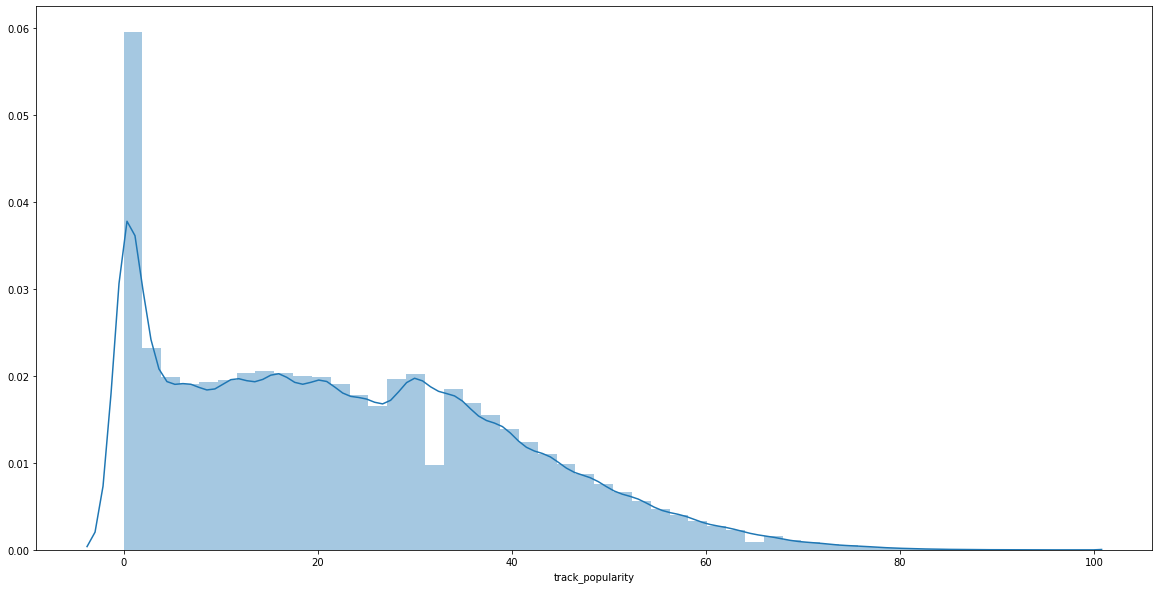

In [13]:
#Plot distributions of each genre 
fig = plt.figure(figsize=(20,10))

sns.distplot(songs.track_popularity, kde=True)



plt.show()

In [ ]:
#Creating column for tracks over 50 popularity score
songs['popularity_50'] = song['track_popularity'] 

In [ ]:
# Added dummy columns for categeorical variables
songs2 = pd.get_dummies(songs2, columns=['mode', 'key'], drop_first=True)

In [ ]:
#Define appropriate X and y
X = songs2[songs2.columns[1:-1]]
y = songs2.track_popularity

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)